In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
import random
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures

from matplotlib.backends.backend_pdf import PdfPages

In [38]:
random.seed(1234)
mu, sigma = 0, 2 # mean and standard deviation
e = np.random.normal(mu, sigma, 20) #noise from guassian distribution

#constant
a0 = 2

#coeffients
a1 = -3
a2 = 1
a3 = 5
a4 = -8
a5 = 3
a6 = 5
a7 = 1
a8 = -2
a9 = -5

#variable(linspace (start, stop, numb of items to generate))
x = np.linspace(0, 2, 20)

In [39]:
#list of parameters, degrees and others
parameters = [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9] 

degree = [0, 1, 2, 3, 4, 5, 7, 10 , 15, 35]

num_params_list = []
aic_list = []
bic_list = []

In [40]:
#Function to make the generating data process iterative
def generate_data(length, order):
    p = parameters[:order]
    y = np.zeros(length)
    
    for i in range(len(p)):
        y += p[i] * x ** i
        
    y += e
    return y 

In [41]:
#generate cubic data 
y = generate_data(20, 4)

In [42]:
# calculate aic for regression
def calculate_aic(n, mse, num_params):
    aic = n * log(mse) + 2 * num_params
    return aic
 
# calculate bic for regression
def calculate_bic(n, mse, num_params):
    bic = n * log(mse) + num_params * log(n)
    return bic

def train_polynomial_model(x, y, degree):
    lin_reg = LinearRegression()
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = lin_reg.fit(x_poly, y)
    y_pred = model.predict(x_poly)
    num_params = len(model.coef_) + 1
    num_params_list.append(num_params)
    mse = mean_squared_error(y, y_pred)
    aic = calculate_aic(len(y), mse, num_params)
    aic_list.append(aic)
    print('AIC: %.3f' % aic)
    # calculate the bic
    bic = calculate_bic(len(y), mse, num_params)
    bic_list.append(bic)
    print('BIC: %.3f' % bic)
    return y_pred

def print_stats(y, train_model):
    print('r2: {}'.format(r2_score(y, train_model)))
    print('MSE: {}'.format(mse(y, train_model)))

def plot_model(x, y, train_model):
    plt.figure(figsize =(15,10))
    plt.title('Line of Best Fit')
    plt.scatter(x, y)
    plt.plot(x, train_model)
    plt.show()
    plt.savefig('fig.jpg')

AIC: 102.535
BIC: 104.526
r2: 0.0
MSE: 137.92739204855792


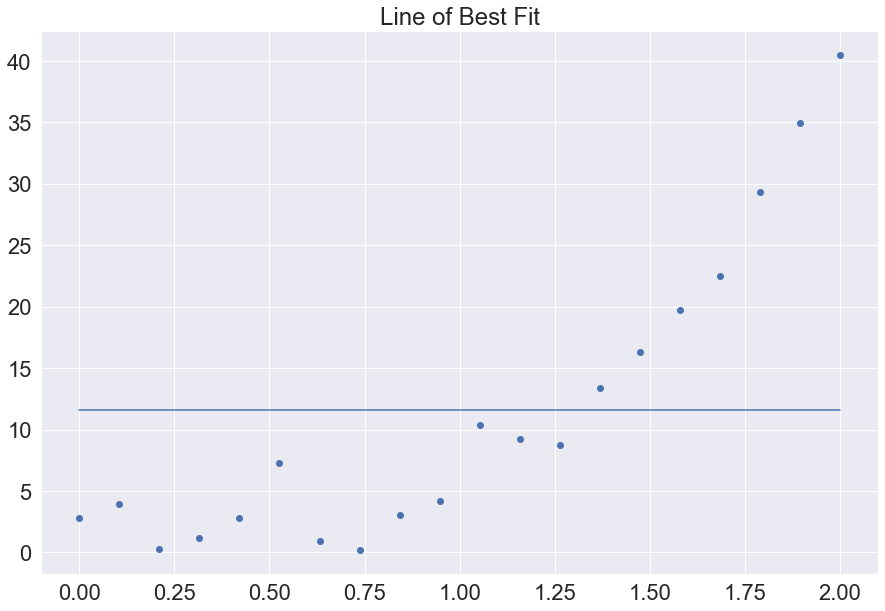

AIC: 75.139
BIC: 78.126
r2: 0.7700258249685391
MSE: 31.719738200607992


<Figure size 432x288 with 0 Axes>

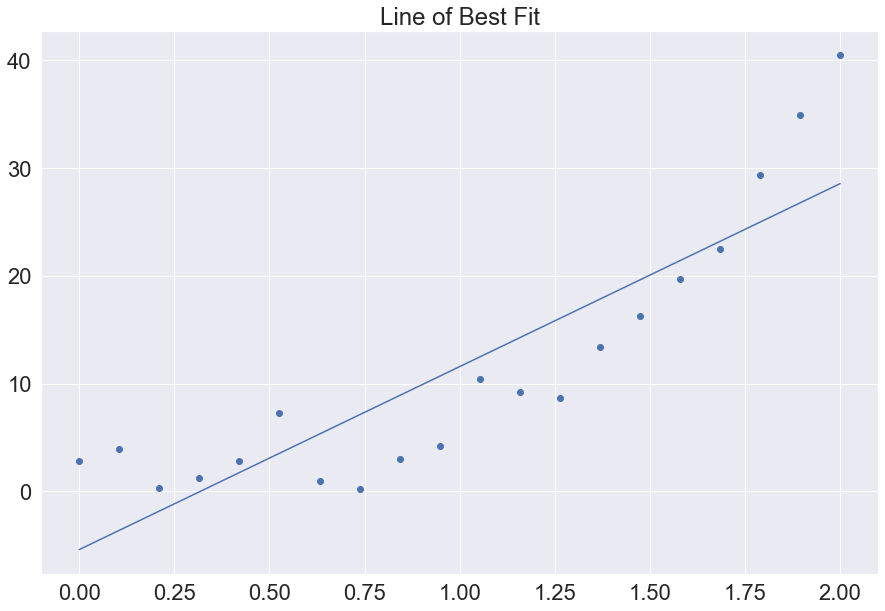

AIC: 37.272
BIC: 41.255
r2: 0.968668848900491
MSE: 4.321423961034592


<Figure size 432x288 with 0 Axes>

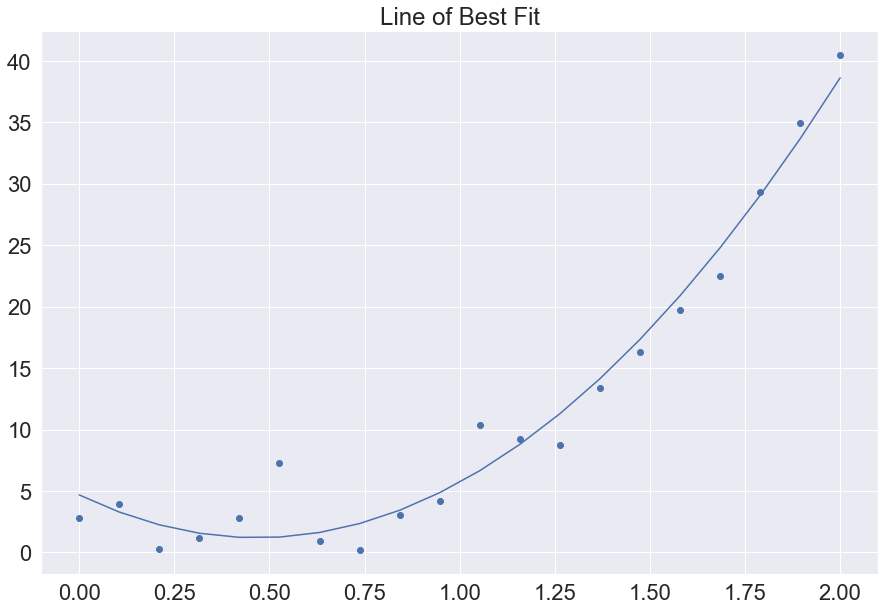

AIC: 34.419
BIC: 39.398
r2: 0.9754190453065132
MSE: 3.390386974936395


<Figure size 432x288 with 0 Axes>

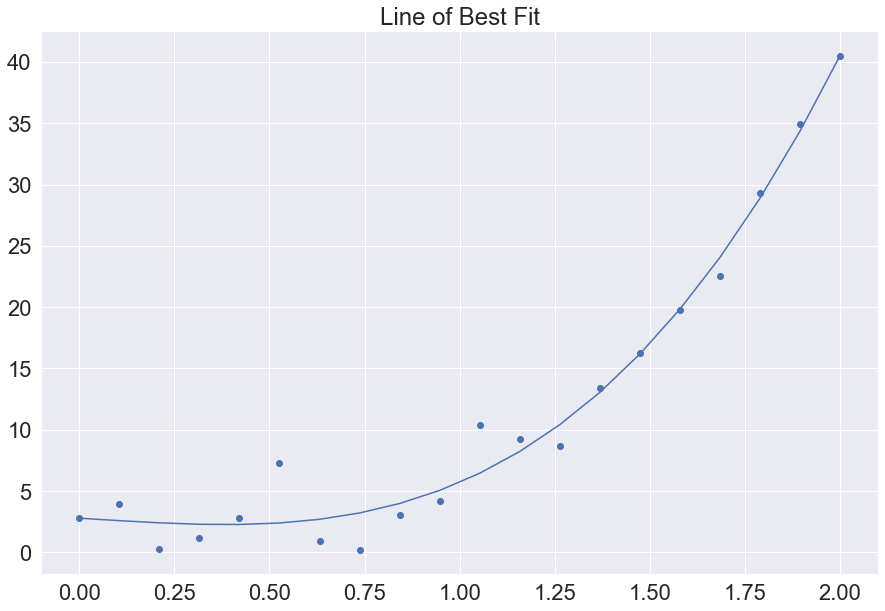

AIC: 36.319
BIC: 42.293
r2: 0.9755416291145335
MSE: 3.3734793099887797


<Figure size 432x288 with 0 Axes>

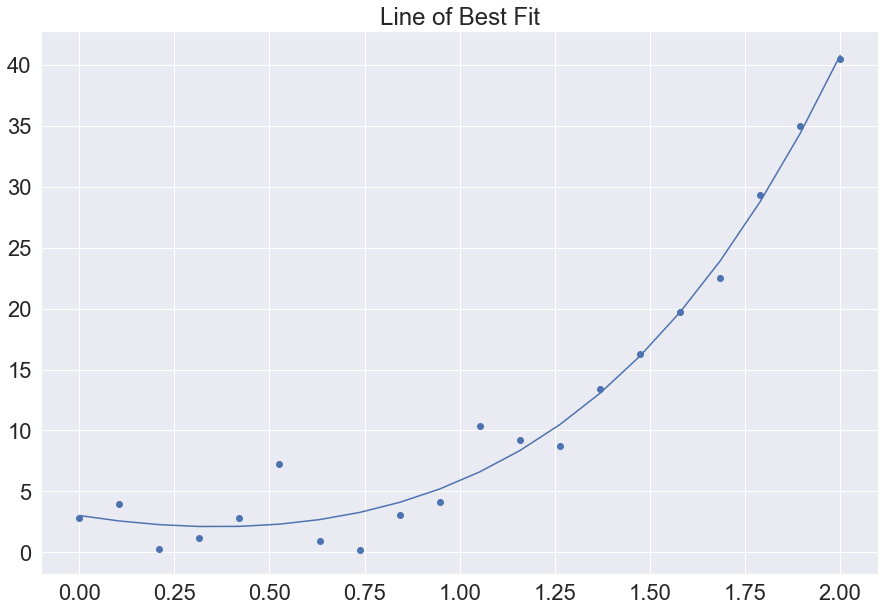

AIC: 38.294
BIC: 45.264
r2: 0.9755716474458128
MSE: 3.3693389598417602


<Figure size 432x288 with 0 Axes>

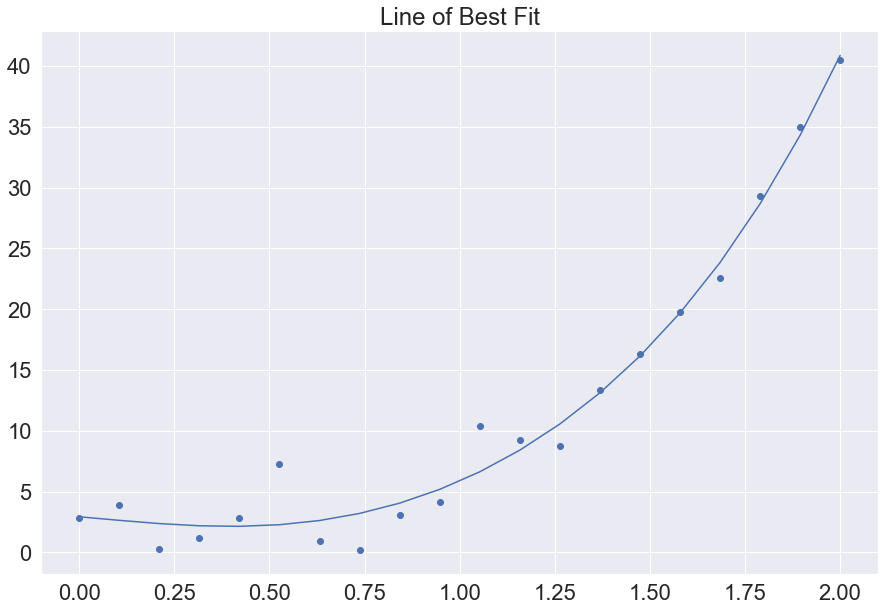

AIC: 40.628
BIC: 49.590
r2: 0.9775242994667624
MSE: 3.100014759013841


<Figure size 432x288 with 0 Axes>

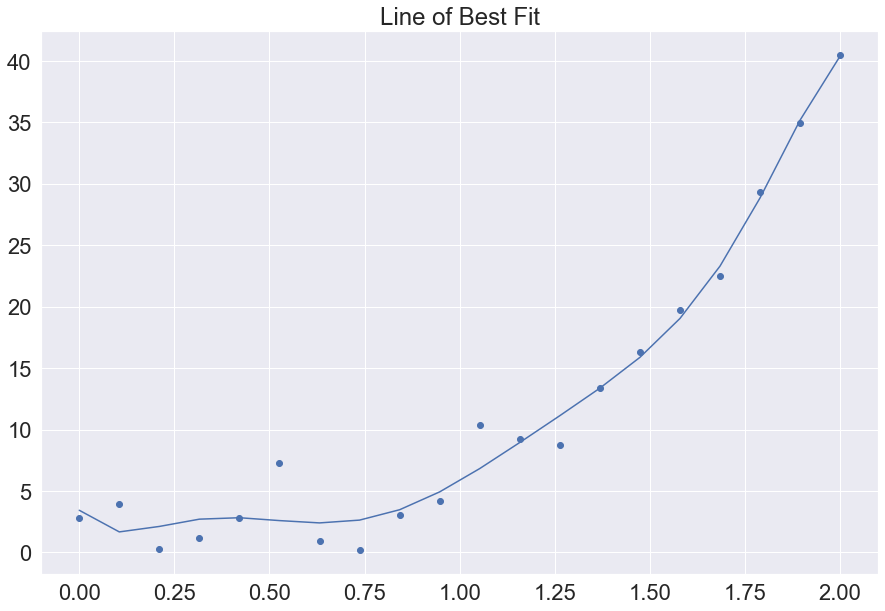

AIC: 32.975
BIC: 44.924
r2: 0.9886435358190904
MSE: 1.566367487365721


<Figure size 432x288 with 0 Axes>

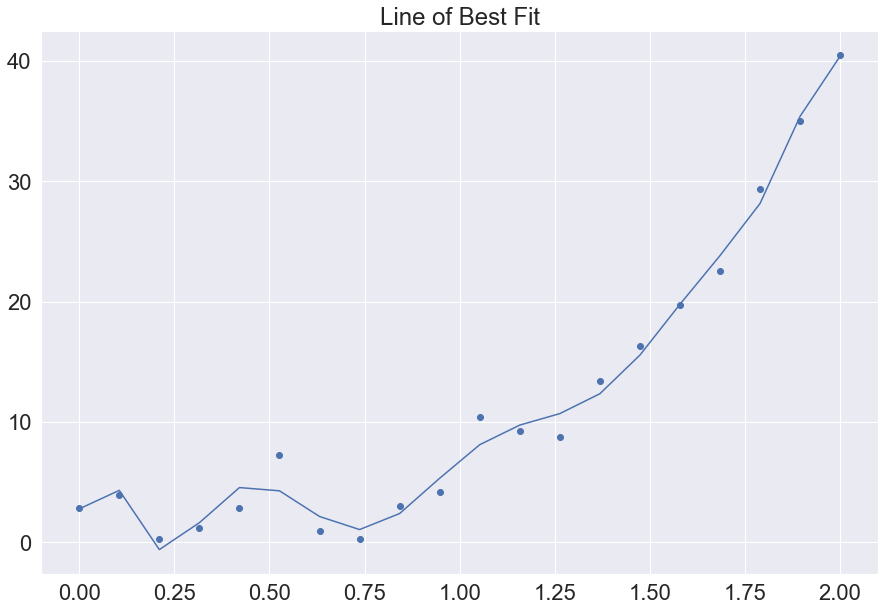

AIC: 30.860
BIC: 47.787
r2: 0.9938033770880104
MSE: 0.8546840377590701


<Figure size 432x288 with 0 Axes>

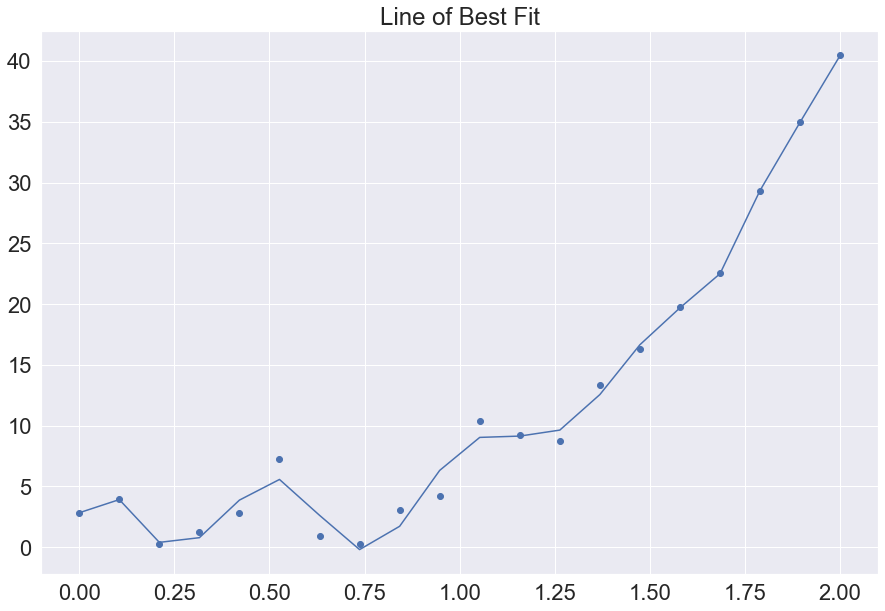

AIC: 52.792
BIC: 89.634
r2: 0.9974891856627656
MSE: 0.3463100734528764


<Figure size 432x288 with 0 Axes>

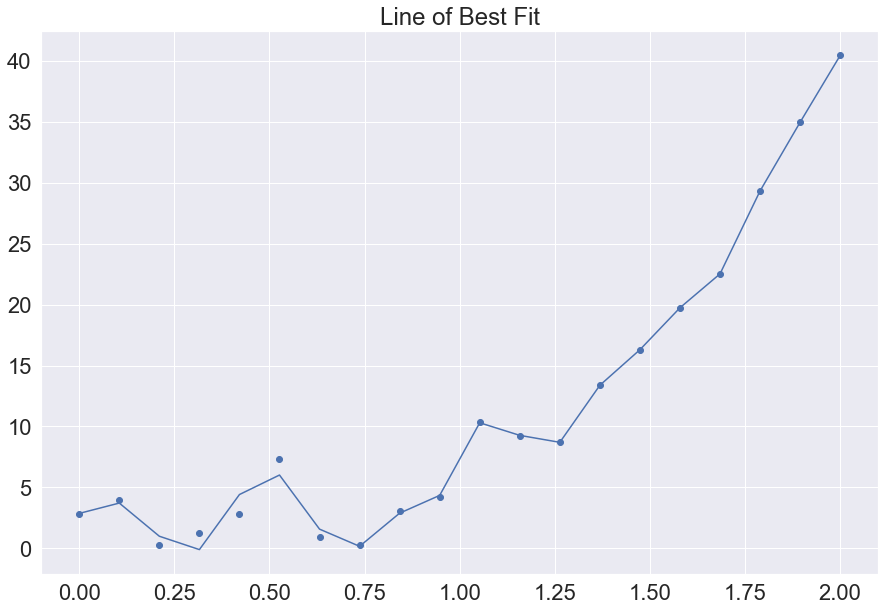

<Figure size 432x288 with 0 Axes>

In [43]:
#model output
for i in range(len(degree)):
    train_model = train_polynomial_model(x, y, degree[i])
    stats = print_stats(y, train_model)
    plots = plot_model(x, y, train_model)

## Comparing AIC and BIC

In [44]:
df = pd.DataFrame(list(zip(num_params_list, aic_list, bic_list)), columns =['Number of Parameters', 'AIC', 'BIC'])
print(df)

   Number of Parameters         AIC         BIC
0                     2  102.534548  104.526013
1                     3   75.138783   78.125980
2                     4   37.271699   41.254628
3                     5   34.418881   39.397543
4                     6   36.318893   42.293287
5                     7   38.294331   45.264457
6                     9   40.628137   49.589728
7                    12   32.975185   44.923972
8                    17   30.859532   47.786980
9                    37   52.791585   89.633679


In [56]:
df2 = pd.melt(df, 'Number of Parameters', var_name='Measure', 
              value_name='Value')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


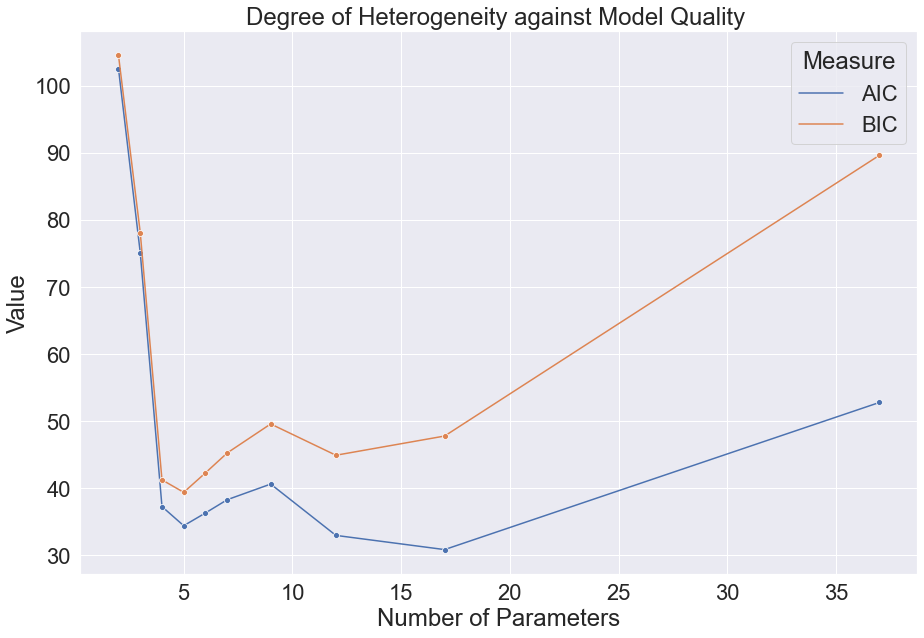

In [64]:
plt.figure(figsize=(15,10))
sns.lineplot('Number of Parameters', 'Value', marker='o', hue='Measure', 
             data=df2)
plt.title('Degree of Heterogeneity against Model Quality ')
plt.savefig("comp.png")

In [ ]:
# sns.set(font_scale=2)
# figure = sns.relplot(data=df, x="Number of Parameters", y="AIC", kind='line')
# plt.title('Degree of Heterogeneity against Model Quality ')
# figure.fig.set_size_inches(15,10)
# figure.savefig("AIC.png")

In [ ]:
# sns.set(font_scale=2)
# figure = sns.relplot(data=df, x="Number of Parameters", y="BIC", kind='line')
# plt.title('Degree of Heterogeneity against Model Quality ')
# figure.fig.set_size_inches(15,10)
# figure.savefig("bic.png")

# Previous Model (First attempt)

In [ ]:
#polynomial 3rd order
# y = a0 + a1*x + a2*x**2 + a3*x**3 + a4*x**4 + e

# plt.figure(figsize=(10,8))
# plt.scatter(x, y)

In [212]:
#fitting linear regression
# lin_reg = LinearRegression()
# lin_reg.fit(x.reshape(-1, 1), y)
# model_pred = lin_reg.predict(x.reshape(-1, 1))

In [ ]:
# plt.figure(figsize=(10,8));
# plt.scatter(x, y);
# plt.plot(x, model_pred);
# print (model_pred)

In [ ]:
# print('R-squared: {}'.format(r2_score(y, model_pred)))
# print('MSE: {}'.format(mse(y, model_pred)))

In [14]:
# polynomial_features= PolynomialFeatures(degree=2)
# x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
# lin_reg.fit(x_poly, y)
# y_poly_pred = lin_reg.predict(x_poly)

In [ ]:
# print('R-squared: {}'.format(r2_score(y, y_poly_pred)))
# print('MSE: {}'.format(mse(y, y_poly_pred)))

In [ ]:
# plt.figure(figsize=(10,8));
# plt.scatter(x, y);
# plt.plot(x, y_poly_pred);

In [17]:
# polynomial_features= PolynomialFeatures(degree=3)
# x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
# lin_reg.fit(x_poly, y)
# y_poly_pred = lin_reg.predict(x_poly)

In [ ]:
# print('R-squared: {}'.format(r2_score(y, y_poly_pred)))
# print('MSE: {}'.format(mse(y, y_poly_pred)))

In [ ]:
# plt.figure(figsize=(10,8));
# plt.scatter(x, y);
# plt.plot(x, y_poly_pred);

In [20]:
# polynomial_features= PolynomialFeatures(degree=4)
# x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
# lin_reg.fit(x_poly, y)
# y_poly_pred = lin_reg.predict(x_poly)

In [ ]:
# print('R-squared: {}'.format(r2_score(y, y_poly_pred)))
# print('MSE: {}'.format(mse(y, y_poly_pred)))

In [ ]:
# plt.figure(figsize=(10,8));
# plt.scatter(x, y);
# plt.plot(x, y_poly_pred);